In [71]:
import sys
sys.path.append('../') 

import MetaTrader5 as mt5
import pytz
import numpy as np
import pandas_ta as ta
import vectorbt as vbt
import pandas as pd

from datetime import datetime
from terminal.Extensions.MT5Helper import MT5Helper
from terminal.Extensions.Range import Range

In [72]:
mt5.initialize()

True

In [76]:
brick_size = 2

from_date = datetime(2024, 5, 1, tzinfo=pytz.utc)
to_date = datetime(from_date.year, 5, 31, 23, 59, 59, 0, tzinfo=pytz.utc)
data = mt5.copy_ticks_range('WDO$', from_date, to_date, mt5.COPY_TICKS_TRADE)

rates = MT5Helper.OHLC(data, '10s')
rates.index = rates.index.tz_localize(None)

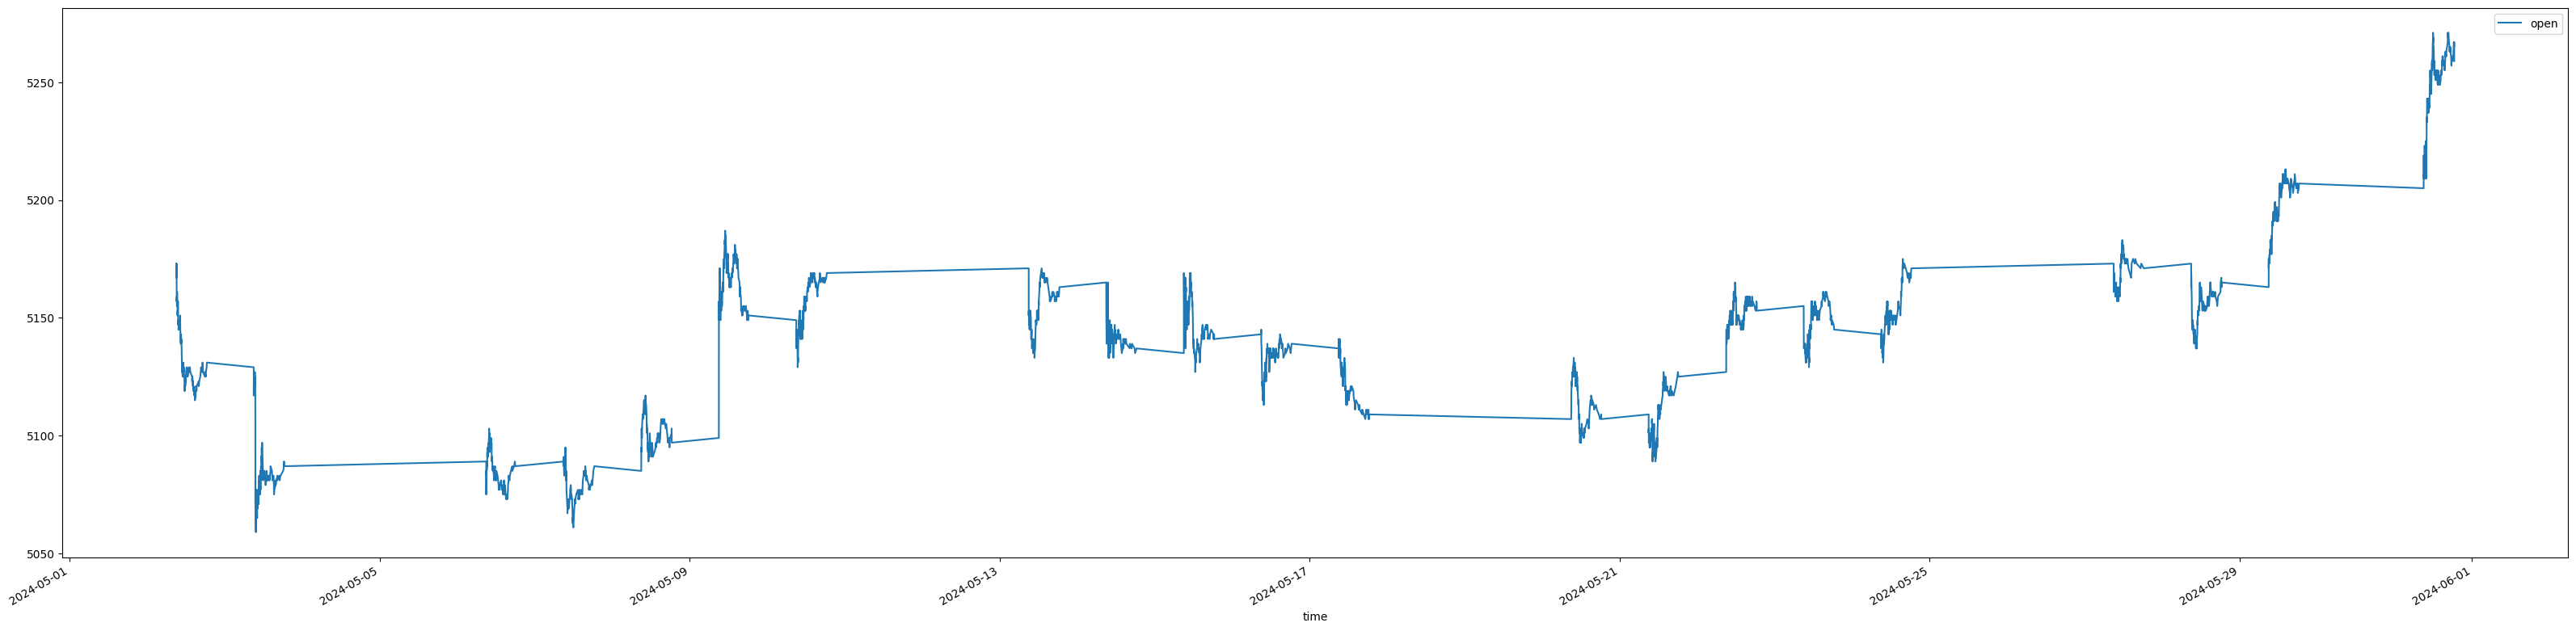

In [77]:
range = Range(brick_size=brick_size, times=rates.index.values, prices=rates["open"])
range_oc = pd.DataFrame(range.bricks)
range_oc.index = range_oc["time"]
range_oc.drop(columns=["time"], inplace=True)
range_oc[["open"]].plot(figsize=(40,10))
range_oc.to_excel("output.xlsx")

In [78]:
fast_ma = vbt.MA.run(range_oc["close"], 5)
slow_ma = vbt.MA.run(range_oc["close"], 15)

entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)

pf = vbt.Portfolio.from_signals(range_oc["close"], entries, exits, init_cash=100)

print(pf.stats())
print(pf.returns_stats())

Start                         2024-05-02 09:03:10
End                           2024-05-31 18:29:20
Period                                       3465
Start Value                                 100.0
End Value                              103.277559
Total Return [%]                         3.277559
Benchmark Return [%]                     1.701141
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                         1.043465
Max Drawdown Duration                       877.0
Total Trades                                  133
Total Closed Trades                           133
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            38.345865
Best Trade [%]                           1.019808
Worst Trade [%]                         -0.232243
Avg Winning Trade [%]                    0.181719
Avg Losing Trade [%]                    -0.088582


c:\Users\agabo\miniconda3\envs\mt5jupyter\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning: Metric 'sharpe_ratio' requires frequency to be set
  warnings.warn(warning_message)
c:\Users\agabo\miniconda3\envs\mt5jupyter\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning: Metric 'calmar_ratio' requires frequency to be set
  warnings.warn(warning_message)
c:\Users\agabo\miniconda3\envs\mt5jupyter\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning: Metric 'omega_ratio' requires frequency to be set
  warnings.warn(warning_message)
c:\Users\agabo\miniconda3\envs\mt5jupyter\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning: Metric 'sortino_ratio' requires frequency to be set
  warnings.warn(warning_message)
c:\Users\agabo\miniconda3\envs\mt5jupyter\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning: Metric 'ann_return' requires frequency to be set
  warnings.warn(warning_message)
c:\Users\agabo\minicon